In [1]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
import keras
from keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf


In [2]:

#import  train test data 
## loading training set
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/train',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


## loading validation dataset
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    '../input/skin-cancer-malignant-vs-benign/test',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [3]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


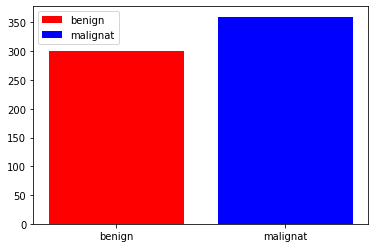

In [4]:
#visulaize test_data
fig, ax = plt.subplots()
ax.bar(["benign"],[300],color= "r",label='benign')
ax.bar(["malignat"],[360],color ="b",label ="malignat")
ax.legend()

benign


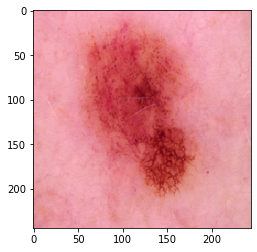

In [5]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

malignant


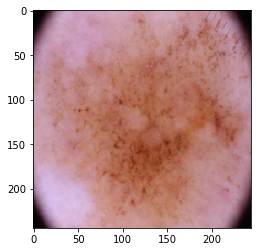

In [6]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1080.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("malignant")
plt.imshow(new_img)

In [7]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

In [8]:
#compile the model
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [19]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
83/83 [==============================] - 11s 137ms/step - loss: 0.3558 - accuracy: 0.8290 - val_loss: 0.3499 - val_accuracy: 0.8348
Epoch 2/50
83/83 [==============================] - 11s 135ms/step - loss: 0.3500 - accuracy: 0.8214 - val_loss: 0.4557 - val_accuracy: 0.7742
Epoch 3/50
83/83 [==============================] - 12s 143ms/step - loss: 0.3517 - accuracy: 0.8309 - val_loss: 0.3402 - val_accuracy: 0.8348
Epoch 4/50
83/83 [==============================] - 11s 137ms/step - loss: 0.3522 - accuracy: 0.8278 - val_loss: 0.3829 - val_accuracy: 0.8136
Epoch 5/50
83/83 [==============================] - 12s 147ms/step - loss: 0.3473 - accuracy: 0.8286 - val_loss: 0.3714 - val_accuracy: 0.8303
Epoch 6/50
83/83 [==============================] - 11s 138ms/step - loss: 0.3359 - accuracy: 0.8385 - val_loss: 0.4144 - val_accuracy: 0.8000
Epoch 7/50
83/83 [==============================] - 11s 138ms/step - loss: 0.3493 - accuracy: 0.8328 - val_loss: 0.3604 - val_accuracy: 0.8227

In [20]:
#evulate model
model.evaluate(test_data)

21/21 [==============================] - 1s 65ms/step - loss: 0.3604 - accuracy: 0.8424


[0.36042872071266174, 0.842424213886261]

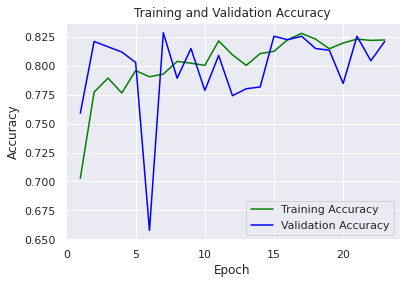

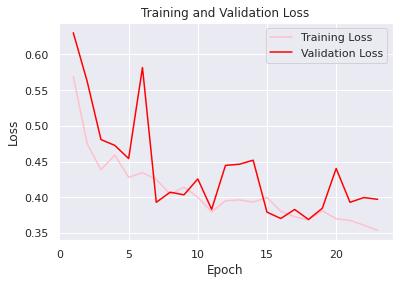

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 

[0]
Benign


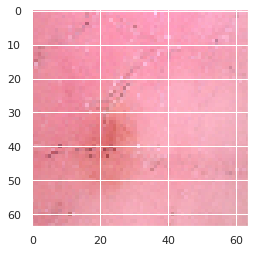

In [13]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


[1]
Malignant


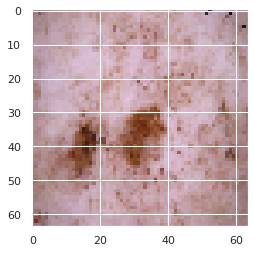

In [14]:
#example 2
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/train/malignant/1006.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)



[0]
Benign


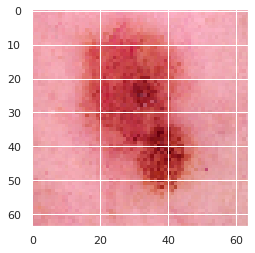

In [15]:
#example 3
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/benign/1261.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


[1]
Malignant


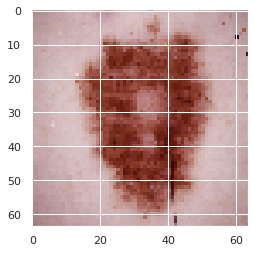

In [16]:
#example 3=4
from keras.preprocessing import image
import numpy as np
image_path = "../input/skin-cancer-malignant-vs-benign/test/malignant/1058.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


In [17]:
#save file as h5 model
from keras.models import model_from_json
xception_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(xception_json)
# serialize weights to HDF5
model.save("model_skin2.h5") 
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model_skin.tflite', 'wb') as f:
  f.write(tflite_model)